# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 6</span>

In this exercise, we want to simulate the 1-dimensional Ising model. We consider a chain of N objects (with periodic boundary conditions) that interact with an external magnetic field h and with their immediate neighbors as described by the Hamiltonian:

$H = -J\sum_{i=1}^N s_is_{i+1} - \frac{h}{2}\sum_{i=1}^N(s_i + s_{i+1})$

where we have considered $\mu_B = 1$, $k_B = 1$, {$s_i$} are spin variables that take a value in {-1;1} and $J > 0$ (favoring spin alignment).

This model has the important advantage of being analytically solvable: we can therefore compare the results of our simulations with known solutions.

The quantities we want to estimate are:

1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B\beta^2(\langle H^2 \rangle_{h=0} - \langle H \rangle_{h=0}^2)$
3. $\chi(N,T) = \beta(\langle(\sum_{i=1,N} s_i)^2\rangle_{h=0})$
4. $M(N,T,h=0.02) = \langle\sum_{i=1,N} s_i\rangle_{h=0.02}$

in a system of $N = 50$ spins with $J = 1.0$, sampling the temperature range (in K) [0.5, 2.0].

To evolve the system configurations, we need to sample the probability distribution of states (Boltzmann distribution):

$p(\mu) = \frac{e^{-\beta E_\mu}}{Z}$

where we have characterized a specific state with $\mu$, $\beta = 1/k_BT$ and $Z$ is the partition function of the system. We have implemented this possibility in two ways:

* Metropolis Algorithm
* Gibbs Sampling

## Equilibration

At the beginning of the first simulation, the system is created in the characteristic configuration of an infinite temperature: all spins are randomly aligned. There is then an equilibration phase, in which the system evolves towards more probable states at the temperature set for the simulation. To evaluate when this process is finished, some statistical quantities of interest can be graphically represented (in this case M/N magnetization per particle - with h = 0.02). Equilibration is reached when the considered quantities oscillate around a stable value. We plotted the magnetization at $T=0.5$ and deduced that the system reaches equilibrium after 300-400 steps. Knowing this, we make the system evolve for more than 300-400 steps without taking measurement and after we use  SYS.block_reset(0).

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

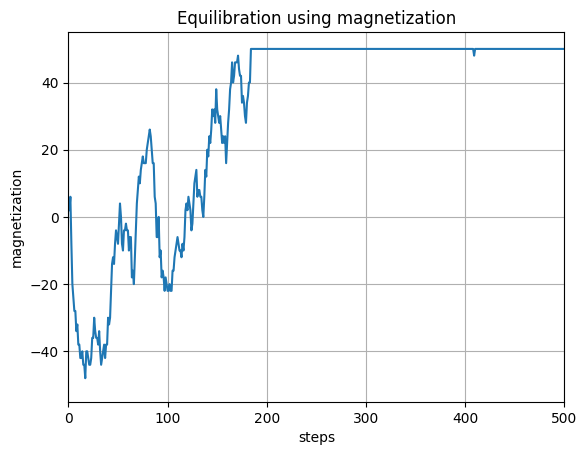

In [4]:
n, a = np.loadtxt("magnetization_equilibrium.dat", usecols=(0,1), unpack='true')
plt.plot(n, a)
plt.xlabel('steps')
plt.ylabel('magnetization')
plt.title('Equilibration using magnetization')
plt.grid(True)
plt.xlim(0,500)
plt.show()

The graphs displayed below are all generated using the Python script from LSN_Exercises_06(brutta).ipynb, which requires a considerable amount of time to execute. We use 100 blocks with 1000 steps per block.

In [12]:
#code for analytical solutions
def Umodel(T,J,N):
    beta = 1/T
    frac = (1+np.tanh(beta*J)**(N-2))/(1+np.tanh(beta*J)**N)
    return -J*np.tanh(beta*J)*frac

def ChiModel(T,J,N):
    beta = 1/T
    tanhN = np.tanh(beta*J)**N
    return 50*beta*np.exp(2*beta*J)*(1-tanhN)/(1+tanhN)

def HeatModel(T,J,N):
    beta = 1/T
    th = np.tanh(J/T)
    thN= th**N
    ch = 1/th
    heat=((beta*J)**2)*(((1+thN+(N-1)*(th**2)+(N-1)*(ch**2)*thN)/(1+thN))-N*((th+ch*thN)/(1+thN))**2)
    return heat*50

def MagModel(T,J,N,h):
    b=1./T
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**N + l2**N
    M = (np.exp(b*J)*np.sinh(b*h)*((l1**(N-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(N-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
    return(M*50)

x  = np.linspace(0.4,2.1)
yU = Umodel(x,1.,50.)
yX = ChiModel(x,1.,50.)
yH = HeatModel(x,1.,50.)
yM = MagModel(x,1.,50.,0.02)
zero = np.zeros(x.size)

## Metropolis algorithm

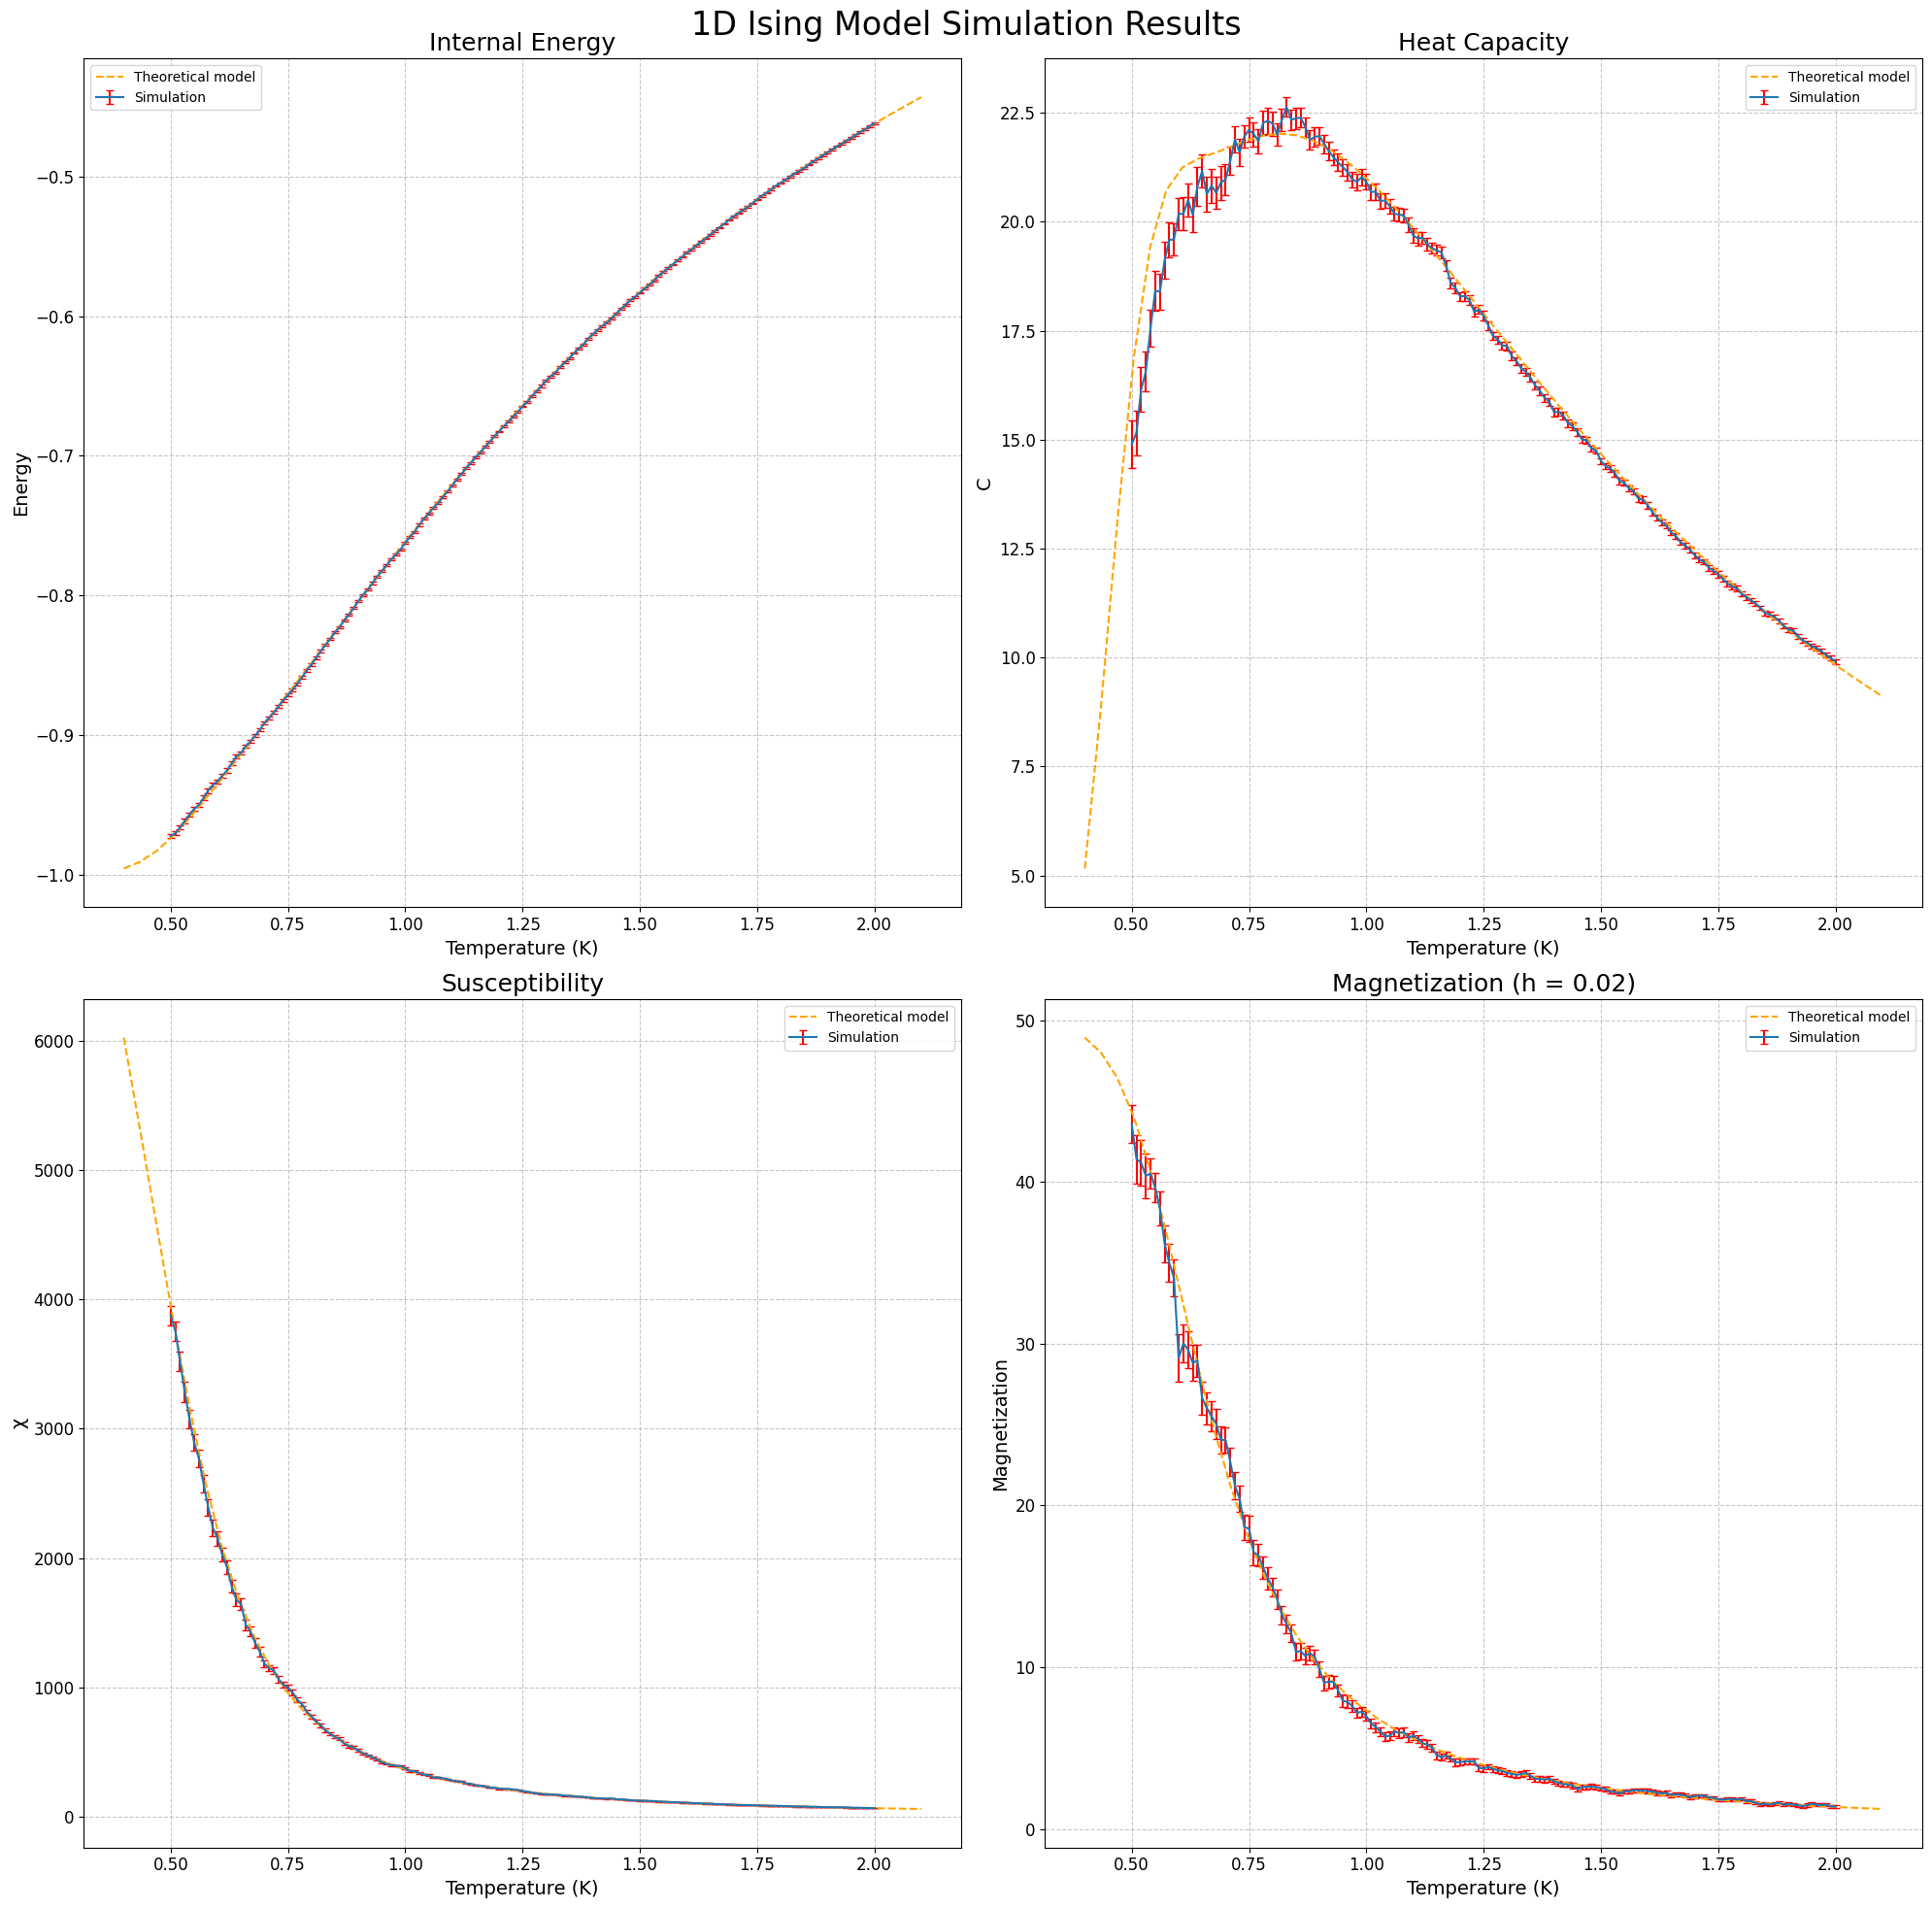

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
T, E, err_E = np.loadtxt("metropolis_00.dat", usecols=(0,1,2), unpack=True)
T, CV, err_CV = np.loadtxt("metropolis_00.dat", usecols=(0,3,4), unpack=True)
T, S, err_S = np.loadtxt("metropolis_00.dat", usecols=(0,5,6), unpack=True)
T, M, err_M = np.loadtxt("metropolis_02.dat", usecols=(0,1,2), unpack=True)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Internal Energy
axs[0, 0].errorbar(T, E, yerr=err_E, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0, 0].plot(x, yU, '--', label='Theoretical model', color='orange')
axs[0, 0].set_title("Internal Energy", fontsize=18)
axs[0, 0].set_xlabel("Temperature (K)", fontsize=14)
axs[0, 0].set_ylabel("Energy", fontsize=14)
axs[0, 0].legend()

# Specific Heat
axs[0, 1].errorbar(T, CV, yerr=err_CV, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0, 1].plot(x, yH, '--', label='Theoretical model', color='orange')
axs[0, 1].set_title("Heat Capacity", fontsize=18)
axs[0, 1].set_xlabel("Temperature (K)", fontsize=14)
axs[0, 1].set_ylabel("C", fontsize=14)
axs[0, 1].legend()

# Susceptibility
axs[1, 0].errorbar(T, S, yerr=err_S, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1, 0].plot(x, yX, '--', label='Theoretical model', color='orange')
axs[1, 0].set_title("Susceptibility", fontsize=18)
axs[1, 0].set_xlabel("Temperature (K)", fontsize=14)
axs[1, 0].set_ylabel("χ", fontsize=14)
axs[1, 0].legend()

# Magnetization
axs[1, 1].errorbar(T, M, yerr=err_M, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1, 1].plot(x, yM, '--', label='Theoretical model', color='orange')
axs[1, 1].set_title("Magnetization (h = 0.02)", fontsize=18)
axs[1, 1].set_xlabel("Temperature (K)", fontsize=14)
axs[1, 1].set_ylabel("Magnetization", fontsize=14)
axs[1, 1].legend()

for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

## Gibbs algorithm

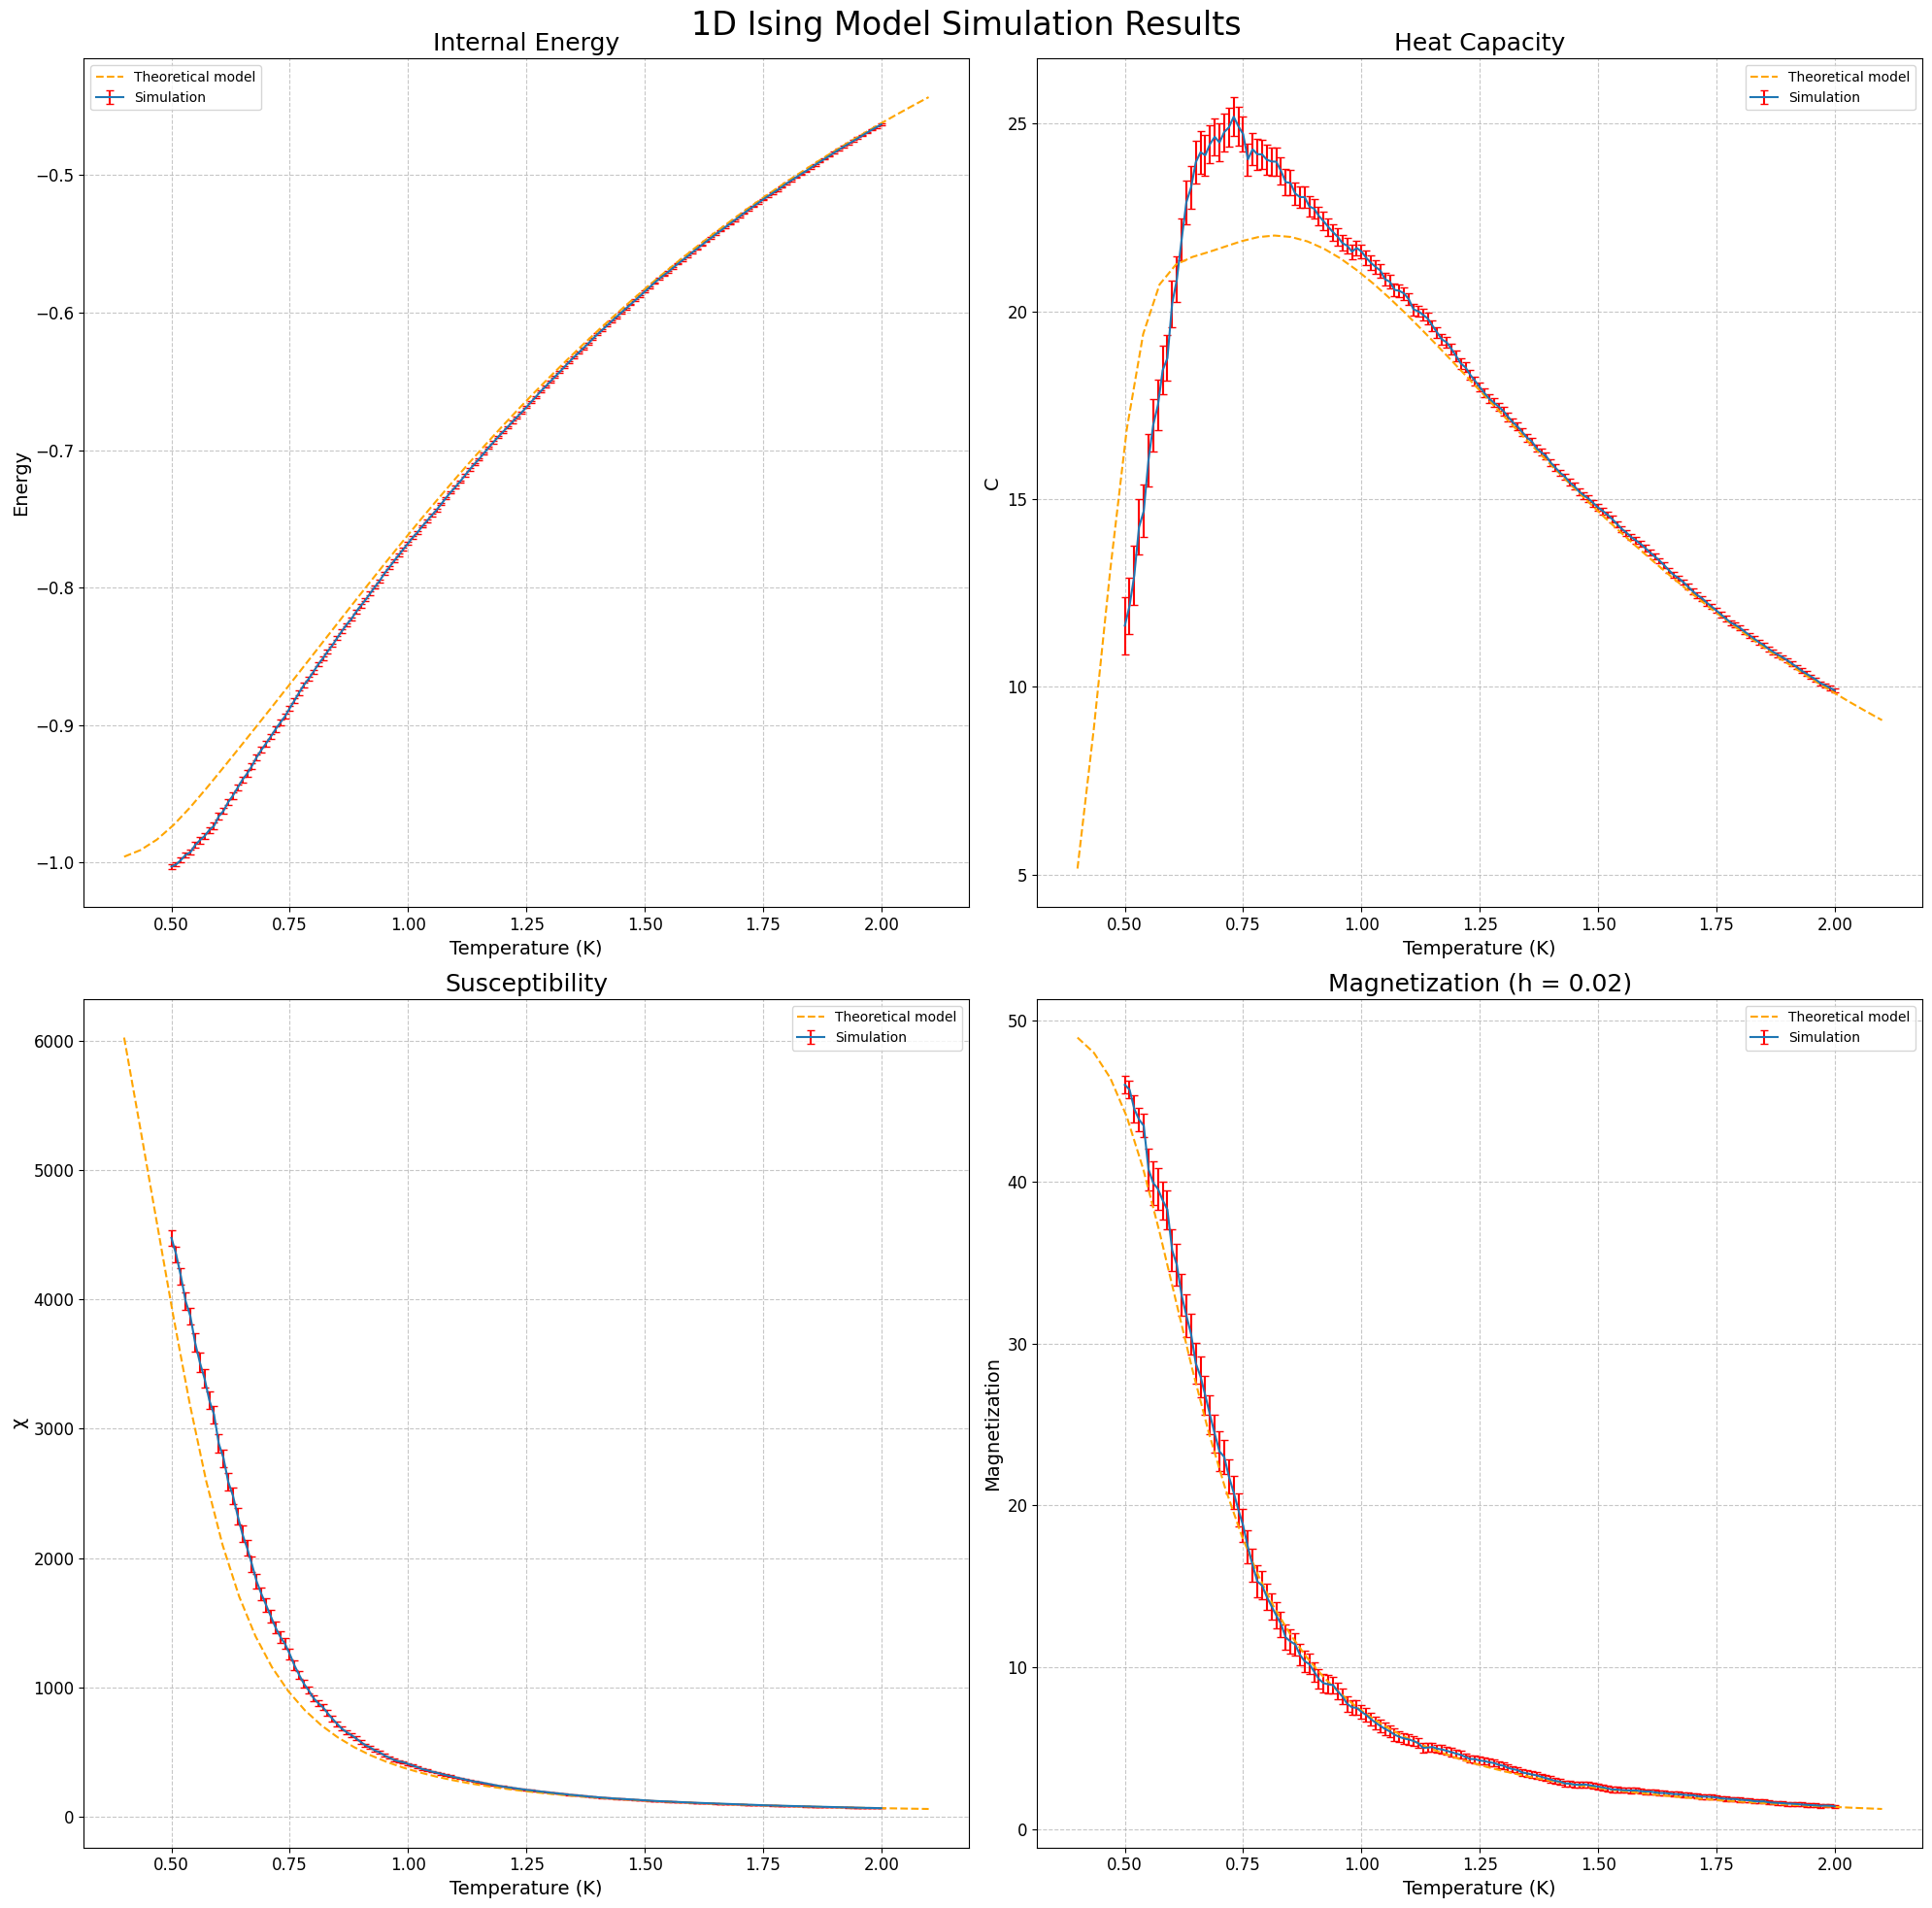

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
T, E, err_E = np.loadtxt("Gibbs_00.dat", usecols=(0,1,2), unpack=True)
T, CV, err_CV = np.loadtxt("Gibbs_00.dat", usecols=(0,3,4), unpack=True)
T, S, err_S = np.loadtxt("Gibbs_00.dat", usecols=(0,5,6), unpack=True)
T, M, err_M = np.loadtxt("Gibbs_02.dat", usecols=(0,1,2), unpack=True)

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle("1D Ising Model Simulation Results", fontsize=24)

# Internal Energy
axs[0, 0].errorbar(T, E, yerr=err_E, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0, 0].plot(x, yU, '--', label='Theoretical model', color='orange')
axs[0, 0].set_title("Internal Energy", fontsize=18)
axs[0, 0].set_xlabel("Temperature (K)", fontsize=14)
axs[0, 0].set_ylabel("Energy", fontsize=14)
axs[0, 0].legend()

# Specific Heat
axs[0, 1].errorbar(T, CV, yerr=err_CV, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[0, 1].plot(x, yH, '--', label='Theoretical model', color='orange')
axs[0, 1].set_title("Heat Capacity", fontsize=18)
axs[0, 1].set_xlabel("Temperature (K)", fontsize=14)
axs[0, 1].set_ylabel("C", fontsize=14)
axs[0, 1].legend()

# Susceptibility
axs[1, 0].errorbar(T, S, yerr=err_S, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1, 0].plot(x, yX, '--', label='Theoretical model', color='orange')
axs[1, 0].set_title("Susceptibility", fontsize=18)
axs[1, 0].set_xlabel("Temperature (K)", fontsize=14)
axs[1, 0].set_ylabel("χ", fontsize=14)
axs[1, 0].legend()

# Magnetization
axs[1, 1].errorbar(T, M, yerr=err_M, capsize=3, ecolor='red', markeredgecolor='black', label='Simulation')
axs[1, 1].plot(x, yM, '--', label='Theoretical model', color='orange')
axs[1, 1].set_title("Magnetization (h = 0.02)", fontsize=18)
axs[1, 1].set_xlabel("Temperature (K)", fontsize=14)
axs[1, 1].set_ylabel("Magnetization", fontsize=14)
axs[1, 1].legend()

for ax in axs.flat:
    ax.grid(True, linestyle='--', alpha=0.7)
    ax.tick_params(labelsize=12)

plt.tight_layout()
plt.show()

From the graphs, we can deduce that the Metropolis algorithm provides better results than the Gibbs algorithm, although both perform well overall. However, it is worth noting that the Heat Capacity is significantly overestimated near its maximum when using the Gibbs algorithm. Additionally, the error bars in the plots are remarkably small, often to the point of being barely visible. This high precision can be attributed to the effectiveness of the equilibration phase, which minimizes result variability.